In [1]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [3]:
import os
import pytesseract
from PIL import Image
import cv2
import re

In [9]:
from google.colab import files

uploaded = files.upload()

# Select the image file
image_file = list(uploaded.keys())[0]

# Open the image
img = Image.open(image_file)
img.save("image.jpg")

Saving Englis_aadhar.jpg to Englis_aadhar (2).jpg


In [10]:
from cv2 import imread

img = cv2.imread('image.jpg')


img = cv2.resize(img, (600, 380))

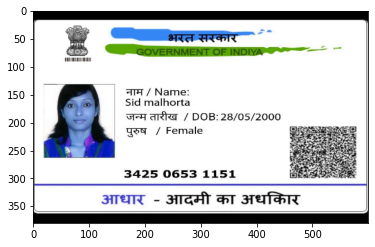

In [11]:
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()

In [12]:
s = str(pytesseract.image_to_string(img))
print("Original output - ")
print(s.strip())
print()
print("Output after removing extra spaces - ")
string = [i for i in s.splitlines() if i.strip() != ""]
print(string)
print()
data = {} 

Original output - 
¥

Ta / Name:
Sid malhorta

wea aka / DOB: 28/05/2000
yeas / Female

3425 0653 1151

Output after removing extra spaces - 
['¥', 'Ta / Name:', 'Sid malhorta', 'wea aka / DOB: 28/05/2000', 'yeas / Female', '3425 0653 1151']



In [13]:
for x, i in enumerate(string):
    j = re.findall('Male|male', i)
    if j:
        for match in j:
            # Cleaning the \n from the list
            text_list = [re.sub('\n', '', x) for x in string]

            # Converting the list into the Strings
            text_list= " ".join(["".join(x) for x in text_list])
            #print(text_list)

            # Cleaning the comas',' and forward slashes'\'
            text_list = re.sub(r'(,|/)', ' ',text_list)
            #print(text_list)

            # Spliting the date of birth by using the '-'
            DOB = text_list.split('DOB:')[1]
            DOB = "-".join(DOB.split())

            outcome = text_list.replace(text_list.split('DOB:')[1],DOB)

            # Extract the name after the "Name:" key
            #name = re.search(r'Name:(.*?)\s', outcome).group(1).strip()
            name = outcome.split("Name:")[1].split("DOB:")[0].strip()
            
            # Extract the DOB after the "DOB:" key
            dob = re.search(r'\d+-\d+-\d+', outcome).group()

            # Extract the Male or Female from the list and assigning it to the Gender variable
            gender = re.findall(r'(Male|Female)', outcome)[0]

            # Extracting the aadhar number from the list and assigning it to the aadhar variable
            aadhar = "-".join(re.findall(r'\d+', outcome)[-3:])

            # Converting to the Dictionaries form by aassigning the key values to them
            data_dict = {"Name": name, "DOB": dob, "gender": gender, "aadhar_number": aadhar}
            print(data_dict)
    X = re.findall('INCOME TAX' , i)
    if X :
      for match in X:
          g = ' '.join(string)
          data['name'] = string[2:4]
          j = re.findall((r"[A-Z]{5}\d{4}[A-Z]"),g)[0]
          data['Pan Number'] = j
          k = re.findall((r"\d{2}/\d{2}/\d{4}"),g)[0]
          data['dob'] = k
          if ("Male" in i) or ("Female" in i) or ("MALE" in i) or ("FEMALE" in i):
            data['gender'] = i.split("/")[1].strip()

      print("Final result:", data)


{'Name': 'Sid malhorta wea aka', 'DOB': '28-05-2000', 'gender': 'Female', 'aadhar_number': '3425-0653-1151'}
